In [ ]:
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#load dataset
df = pd.read_csv(r"C:\Users\Admin\OneDrive\Desktop\Data Analysis And Automation\Sample Data\data_jobs.csv")
df.head()

# cleaning the dataset
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Admin\\OneDrive\\Desktop\\Data Analysis And Automation\\Sample Data\\data_jobs.csv'

In [ ]:
# only Data Analyst jobs in US

df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
# drop NaN values from the column for plotting
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

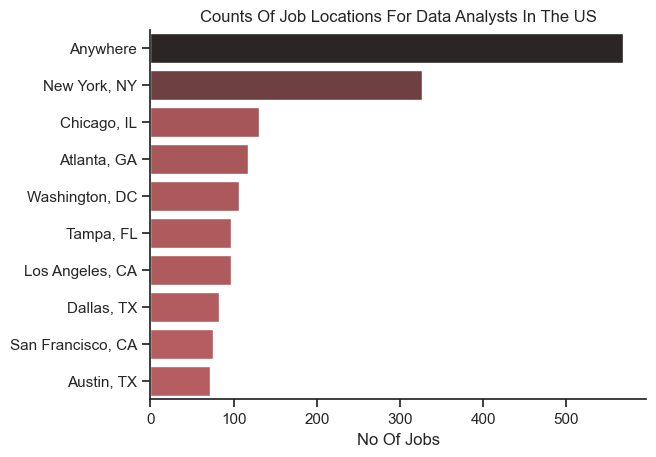

In [ ]:
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:r_r', legend=False)
sns.despine() #remove border
plt.title('Counts Of Job Locations For Data Analysts In The US')
plt.xlabel('No Of Jobs')
plt.ylabel('')
plt.show()


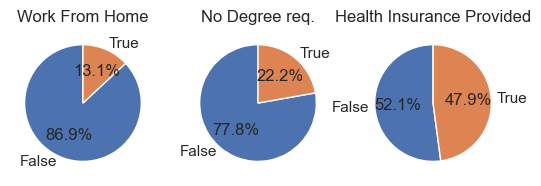

In [ ]:
fig, ax = plt.subplots(1, 3)

dict_columns = {
    'job_work_from_home': 'Work From Home',
    'job_no_degree_mention': 'No Degree req.',
    'job_health_insurance': 'Health Insurance Provided'
}
for i, (column, title) in enumerate(dict_columns.items()):
    ax[i].pie(df_DA_US[column].value_counts(),startangle=90, autopct='%1.1f%%', labels=['False', 'True'])
    ax[i].set_title(title)  
    


plt.show()

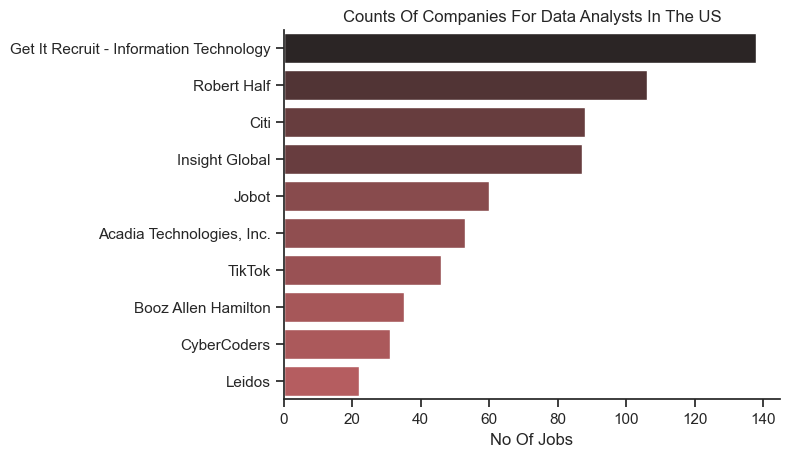

In [ ]:
df_plot = df_DA_US['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:r_r', legend=False)
sns.despine() #remove border
plt.title('Counts Of Companies For Data Analysts In The US')
plt.xlabel('No Of Jobs')
plt.ylabel('')
plt.show()
